# Results of grid search

Here we consider only algorithms with feature selection

* LR
* XGB
* CART

In [1]:
import xgboost as xgb

In [ ]:
from os.path import join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_rows', 200)

In [3]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

In [4]:
df_results = pd.read_csv('../../own_data/190902_grid_pipeline/results.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../own_data/190902_grid_pipeline/results.csv'

In [14]:
df_results = df_results[df_results['model'].isin(['lr-feat-sel', 'xgb-feat-sel', 'cart-feat-sel'])].copy()

In [15]:
df_results['acc_mean'] = df_results['acc_mean'].round(2)
df_results['roc_auc_mean'] = df_results['roc_auc_mean'].round(2)
df_results['acc_std'] = df_results['acc_std'].round(3)
df_results['roc_auc_std'] = df_results['roc_auc_std'].round(3)

In [19]:
df_results['features'] = pd.Categorical(
    df_results['features'], 
    ['bands', 'env_alpha', 'env_beta', 'coh_alpha', 'coh_beta'])

In [21]:
df_results['model'] = pd.Categorical(
    df_results['model'], 
    ['lr-feat-sel', 'xgb-feat-sel', 'cart-feat-sel'])

In [24]:
df_results = df_results.sort_values(['features', 'model'])

In [25]:
df_results

,acc_mean,acc_std,features,model,roc_auc_mean,roc_auc_std
5,0.68,0.023,bands,lr-feat-sel,0.72,0.017
15,0.65,0.028,bands,xgb-feat-sel,0.70,0.027
20,0.74,0.039,bands,cart-feat-sel,0.74,0.039
8,0.80,0.015,env_alpha,lr-feat-sel,0.89,0.009
18,0.76,0.029,env_alpha,xgb-feat-sel,0.81,0.020
23,0.76,0.028,env_alpha,cart-feat-sel,0.76,0.028
9,0.76,0.023,env_beta,lr-feat-sel,0.82,0.017
19,0.65,0.035,env_beta,xgb-feat-sel,0.70,0.030
24,0.63,0.039,env_beta,cart-feat-sel,0.63,0.039
6,0.79,0.016,coh_alpha,lr-feat-sel,0.87,0.009


In [ ]:
df_results.to_clipboard(excel=True)

## Example ROC-curves

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve


def plot_roc_curve(y_true, y_pred, title=None, auc=None, save_path=None):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    
    if auc is None:
        auc = roc_auc_score(y_true, y_pred)
        
    if title is None:
        title = 'Receiver operating characteristic'

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (average area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    if save_path:
        plt.savefig(save_path, transparent=True, dpi=150)


In [27]:
lr_env_alpha_pred = pd.read_csv('../../dev/own_data/190902_grid_pipeline/models_predict_samples/lr_feat_sel_env_alpha.csv')

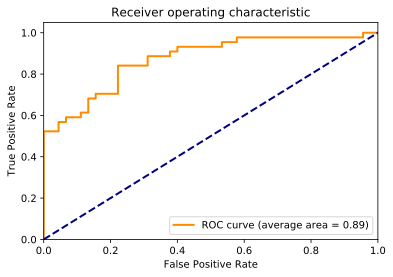

In [28]:
plot_roc_curve(lr_env_alpha_pred['y_true'], lr_env_alpha_pred['y_pred'], auc=0.89, save_path='190916_lr_env_alpha.png')